In [60]:
import sys

!{sys.executable} -m pip install scikit-learn

## Import Libraries

In [80]:
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

%matplotlib inline

## Import Dataset

In [14]:
dataset = pd.read_csv('./iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Initial Data Exploration

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

### Correlation of Features

In [15]:
dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


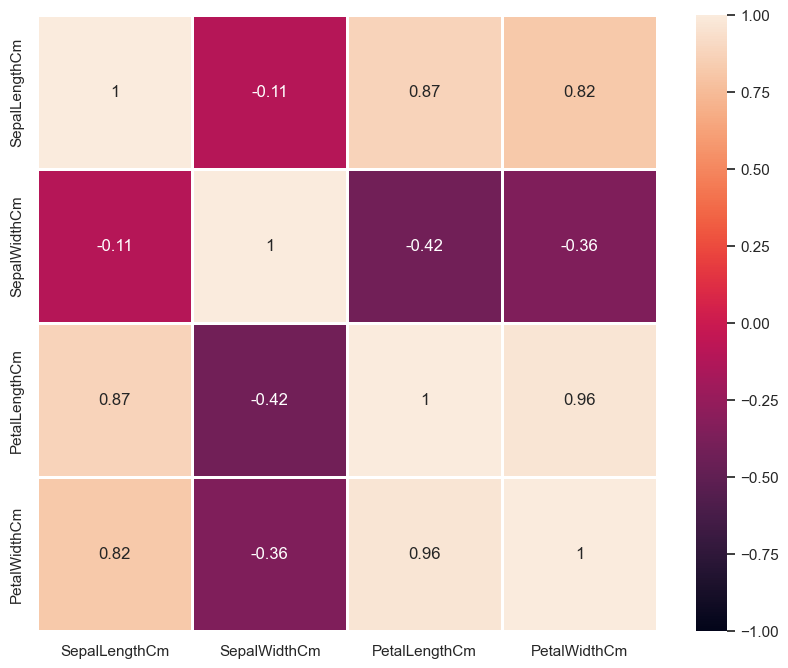

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(), vmin=-1.0, vmax=1.0, annot=True, linewidths=2)
plt.show()

**Strong positive correlation** between petal length and petal width, a **strong positive correlation** between sepal length and petal length, and a **strong positive correlation** between sepal length and petal width.

### Distribution of variables

In [18]:
dataset.groupby('Species').describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm                                                \
                       count   mean       std  min    25%  50%    75%  max   
Species                                                                      
Iris-setosa             50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4   
Iris-versicolor         50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
Iris-virginica          50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

                PetalLengthCm                                               \
                        count   mean       std  min  25%   50%    75%  max   
Species                                                                      
Iris-setosa              50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
Iris-versicolor          50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Iris-virginica           50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

                PetalWidthCm                                            
                       count   mean       std  min  25%  50%  75%  max  
Species                                                                 
Iris-setosa             50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor         50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica          50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

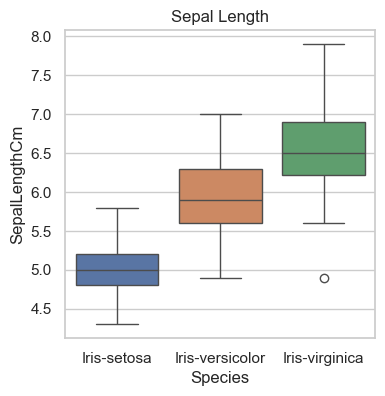

In [40]:
plt.figure(figsize=(4,4))
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=dataset, hue='Species').set_title('Sepal Length')
plt.show()

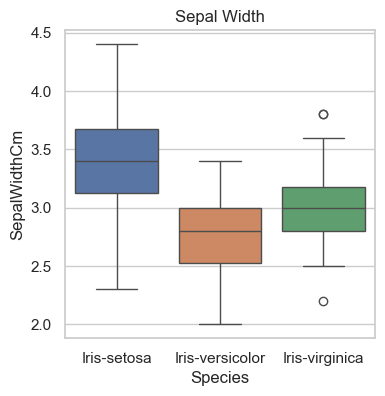

In [32]:
plt.figure(figsize=(4,4))
ax = sns.boxplot(x="Species", y="SepalWidthCm", data=dataset, hue='Species').set_title('Sepal Width')
plt.show()

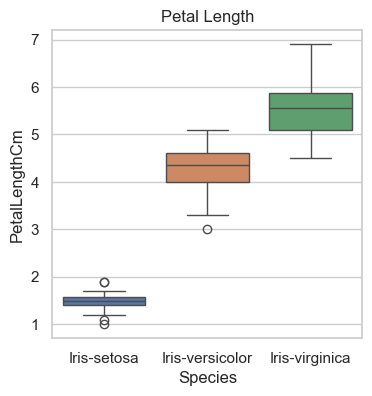

In [33]:
plt.figure(figsize=(4,4))
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=dataset, hue='Species').set_title('Petal Length')
plt.show()

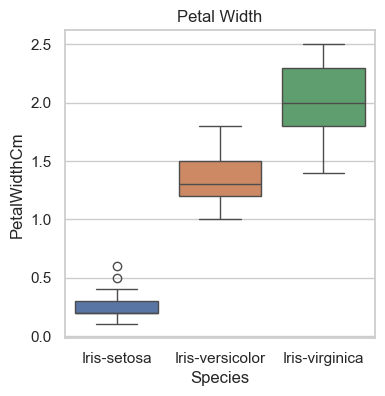

In [34]:
plt.figure(figsize=(4,4))
ax = sns.boxplot(x="Species", y="PetalWidthCm", data=dataset, hue='Species').set_title('Petal Width')
plt.show()

From the four graphs above, we can see that there's a **large difference** in distribution of data especially for **sepal length**, **petal length**, **petal width**, not so much for sepal width.

### Scatter Plot for the dataset

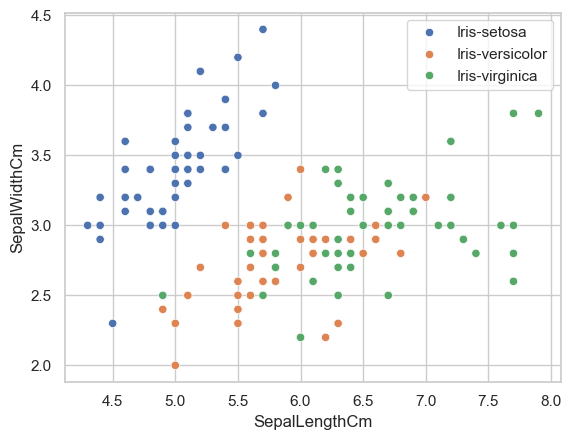

In [58]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue='Species', data=dataset)
plt.legend()
plt.show()

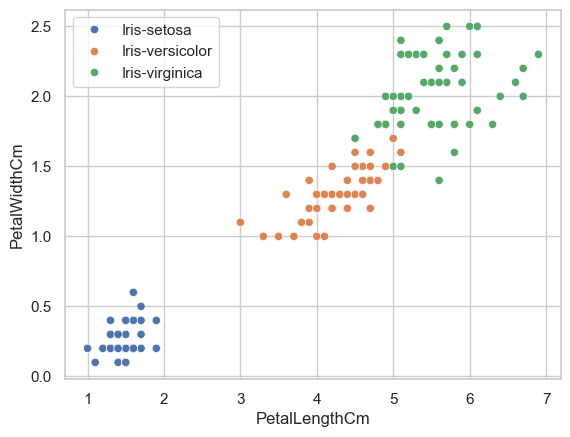

In [56]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue='Species', data=dataset)
plt.legend()
plt.show()

## Build Model

### Prepare dataset

In [116]:
# X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy() # Data
# y =  LabelEncoder().fit_transform(dataset['Species']) # Target

label_encoder = LabelEncoder()
training = pd.concat([dataset[:40], dataset[50:90], dataset[100:140]])
test = pd.concat([dataset[40:50], dataset[90:100], dataset[140:]])

training_X = training[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()
training_y = label_encoder.fit_transform(training['Species'])

test_X  = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()
test_y = label_encoder.fit_transform(test['Species'])

### Train Logistic Regression Model

In [88]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=200).fit(training_X, training_y)

print('Training accuracy:', lr_classifier.score(training_X, training_y))
print('Test accuracy:', lr_classifier.score(test_X, test_y))

Training accuracy: 0.975
Test accuracy: 1.0


### Train Decision Tree Model

In [101]:
from sklearn.tree import DecisionTreeClassifier

dTree_classifier = DecisionTreeClassifier(criterion="entropy").fit(training_X, training_y)

print('Training accuracy:', dTree_classifier.score(training_X, training_y))
print('Test accuracy:', dTree_classifier.score(test_X, test_y))

Training accuracy: 1.0
Test accuracy: 1.0


### Train KNN Model

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier().fit(training_X, training_y)

print('Training accuracy:', knn_classifier.score(training_X, training_y))
print('Test accuracy:', knn_classifier.score(test_X, test_y))

Training accuracy: 0.9666666666666667
Test accuracy: 1.0


### Train Support Vector Machine Model

In [109]:
from sklearn.svm import LinearSVC

svc_classifier = LinearSVC(multi_class='crammer_singer', max_iter=50000, dual="auto").fit(training_X, training_y)

print('Training accuracy:', svc_classifier.score(training_X, training_y))
print('Test accuracy:', svc_classifier.score(test_X, test_y))

Training accuracy: 0.975
Test accuracy: 1.0


### Train Random Forest Model

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=3, random_state=42).fit(training_X, training_y)

print('Training accuracy:', rf_classifier.score(training_X, training_y))
print('Test accuracy:', rf_classifier.score(test_X, test_y))

Training accuracy: 0.9833333333333333
Test accuracy: 1.0


## Save Model

In [110]:
import joblib

joblib.dump(dTree_classifier, './model.joblib')

['./model.joblib']

### Sample Prediction

In [121]:
input = [5.8,2.7,5.1,1.9]
features = np.array(input).reshape(1, -1)

# Load the trained model 
model = joblib.load('model.joblib')

prediction = model.predict(features)

target = label_encoder.inverse_transform(prediction)

print(target[0])

Iris-virginica
